In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving All_good_data(lemmatization).csv to All_good_data(lemmatization).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import missingno as msno 
import seaborn as sns

In [ ]:
df = pd.read_csv('All_good_data(lemmatization).csv')

In [ ]:
del df['Unnamed: 0']
del df['Unnamed: 0.1']

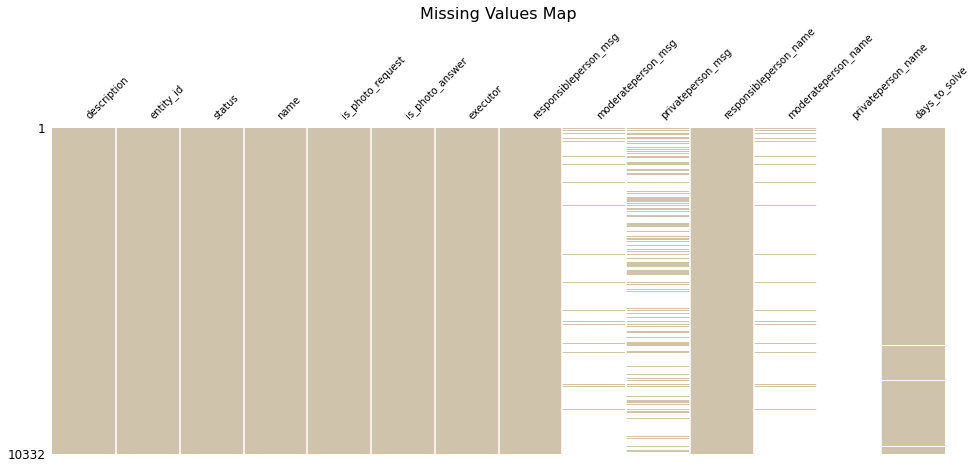

In [ ]:
f, ax = plt.subplots(1, figsize = (16, 6))

msno.matrix(df, ax = ax, color=(207/255, 196/255, 171/255), fontsize=10)

ax.set_title('Missing Values Map', fontsize = 16)
plt.savefig('Missing_Values.png')

In [ ]:
files.download('Missing_Values.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
values = {'moderateperson_msg': 'NS', 'privateperson_msg': 'NS', 'moderateperson_name': 'NS', 'days_to_solve': df['days_to_solve'].mode()[0]}

In [ ]:
df  = df.fillna(values)

In [ ]:
del df['privateperson_name']

In [ ]:
df.to_csv('Final_preprocessed_original_data.csv')

In [ ]:
files.download('Final_preprocessed_original_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

First pard EDA ended


In [ ]:
!pip install navec

In [ ]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

--2020-11-08 12:52:57--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar’

navec_hudlit_v1_12B 100%[===================>]  50.56M  12.6MB/s    in 4.3s    

2020-11-08 12:53:02 (11.8 MB/s) - ‘navec_hudlit_v1_12B_500K_300d_100q.tar’ saved [53012480/53012480]



In [ ]:
from navec import Navec

path = './navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [ ]:
to_preprocess = list(['description','name', 'executor', 'responsibleperson_msg',	'moderateperson_msg',	'privateperson_msg'	,'responsibleperson_name'	,'moderateperson_name'])

In [ ]:
vector = [[0 for column in to_preprocess] for i in range(0, len(df))]

for column in range(0, len(to_preprocess)):
  for i in range(0, len(df)):

    t = []
    for word in str.split(df[to_preprocess[column]][i],' '):
      if (len(word) > 2 ) and (word[2] != '\''):
        if (word[2:-2] in navec):
          t.append(navec[word[2:-2]])
    vector[i][column] = t

In [ ]:
max_len = []

for j in range(0, len(to_preprocess)):

  m_len = 0
  for i in range(0, len(df)):

    if (len(vector[i][j]) > m_len):

      m_len  = len(vector[i][j])

  max_len.append(m_len)

In [ ]:
concat_embed = [[[] for column in to_preprocess] for i in range(0, len(df))]

for j in range(0, len(to_preprocess)):

  m_len = 0
  for i in range(0, len(df)):
    
    concat_embed[i][j] = np.zeros(300)
    if (len(vector[i][j]) > 0):
      for k in range(0, len(vector[i][j])):
        concat_embed[i][j] = concat_embed[i][j] +  vector[i][j][k]

In [ ]:
embeddings = pd.DataFrame(concat_embed, columns=to_preprocess)

In [ ]:
embeddings

,description,name,executor,responsibleperson_msg,moderateperson_msg,privateperson_msg,responsibleperson_name,moderateperson_name
0,"[2.470095630735159, -5.233903811313212, -1.325...","[0.3639061748981476, -0.5678412914276123, -0.2...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.7763525620102882, -2.3635399490594864, -0.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.17654646933078766, 0.0608711764216423, -0.3...","[0.3937665820121765, -0.8001609742641449, 0.00...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[-0.17703428864479065, -1.42155821621418, -0.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.33075375854969025, -3.0789001286029816, -0....","[-0.09724323451519012, -0.1521167904138565, 0....","[-0.03192369267344475, 0.4599711000919342, 0.1...","[-0.06943987682461739, -4.153384190052748, -6....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[-0.21693739295005798, 0.4742131233215332, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.481369074434042, -0.6732280030846596, -0.23...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.18499264121055603, -1.1178307086229324, -1....","[0.8764107674360275, -0.4710679054260254, 0.29...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.6987461075186729, -1.9340835213661194, -0.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...
10327,"[0.028837841004133224, -0.9975220710039139, -1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.3145572245121002, -0.17771506309509277, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10328,"[-0.2649875469505787, -1.2944006770849228, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.3145572245121002, -0.17771506309509277, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10329,"[-0.2649875469505787, -1.2944006770849228, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.3145572245121002, -0.17771506309509277, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10330,"[-1.66305623203516, -3.9039090387523174, -1.25...","[0.16832959651947021, -0.40294739603996277, -0...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[1.996119737625122, -2.373517021536827, -2.347...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
embeddings = embeddings.merge(df[{'is_photo_request', 'is_photo_answer', 'days_to_solve','status' }], how = 'right', left_index=True, right_index=True)

In [ ]:
embeddings

,description,name,executor,responsibleperson_msg,moderateperson_msg,privateperson_msg,responsibleperson_name,moderateperson_name,is_photo_answer,status,days_to_solve,is_photo_request
0,"[2.470095630735159, -5.233903811313212, -1.325...","[0.3639061748981476, -0.5678412914276123, -0.2...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.7763525620102882, -2.3635399490594864, -0.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,verified,0.0,0
1,"[0.17654646933078766, 0.0608711764216423, -0.3...","[0.3937665820121765, -0.8001609742641449, 0.00...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[-0.17703428864479065, -1.42155821621418, -0.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,verified,0.0,0
2,"[0.33075375854969025, -3.0789001286029816, -0....","[-0.09724323451519012, -0.1521167904138565, 0....","[-0.03192369267344475, 0.4599711000919342, 0.1...","[-0.06943987682461739, -4.153384190052748, -6....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,verified,29.0,0
3,"[-0.21693739295005798, 0.4742131233215332, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.481369074434042, -0.6732280030846596, -0.23...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,verified,29.0,0
4,"[0.18499264121055603, -1.1178307086229324, -1....","[0.8764107674360275, -0.4710679054260254, 0.29...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.6987461075186729, -1.9340835213661194, -0.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,verified,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10327,"[0.028837841004133224, -0.9975220710039139, -1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.3145572245121002, -0.17771506309509277, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,solved,7.0,1
10328,"[-0.2649875469505787, -1.2944006770849228, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.3145572245121002, -0.17771506309509277, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,solved,5.0,1
10329,"[-0.2649875469505787, -1.2944006770849228, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.3145572245121002, -0.17771506309509277, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,solved,5.0,1
10330,"[-1.66305623203516, -3.9039090387523174, -1.25...","[0.16832959651947021, -0.40294739603996277, -0...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[1.996119737625122, -2.373517021536827, -2.347...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0,

In [ ]:
names = ['days_to_solve_x',	'status_x', 'is_photo_request_x' ,	'is_photo_answer_x',	'days_to_solve_y', 'status_y',	'is_photo_request_y',	'is_photo_answer_y']

for name in names:
  del embeddings[name]

KeyError: ignored

In [ ]:
features = ['description', 'name', 'executor', 'responsibleperson_msg',
       'moderateperson_msg', 'privateperson_msg', 'responsibleperson_name',
       'moderateperson_name', 'days_to_solve', 'is_photo_request',
       'is_photo_answer']
target = 'status'

In [65]:
embeddings[features]

,description,name,executor,responsibleperson_msg,moderateperson_msg,privateperson_msg,responsibleperson_name,moderateperson_name,days_to_solve,is_photo_request,is_photo_answer
0,"[2.470095630735159, -5.233903811313212, -1.325...","[0.3639061748981476, -0.5678412914276123, -0.2...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.7763525620102882, -2.3635399490594864, -0.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0,0
1,"[0.17654646933078766, 0.0608711764216423, -0.3...","[0.3937665820121765, -0.8001609742641449, 0.00...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[-0.17703428864479065, -1.42155821621418, -0.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0,0
2,"[0.33075375854969025, -3.0789001286029816, -0....","[-0.09724323451519012, -0.1521167904138565, 0....","[-0.03192369267344475, 0.4599711000919342, 0.1...","[-0.06943987682461739, -4.153384190052748, -6....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",29.0,0,0
3,"[-0.21693739295005798, 0.4742131233215332, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.481369074434042, -0.6732280030846596, -0.23...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",29.0,0,0
4,"[0.18499264121055603, -1.1178307086229324, -1....","[0.8764107674360275, -0.4710679054260254, 0.29...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.6987461075186729, -1.9340835213661194, -0.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10327,"[0.028837841004133224, -0.9975220710039139, -1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.3145572245121002, -0.17771506309509277, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7.0,1,0
10328,"[-0.2649875469505787, -1.2944006770849228, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.3145572245121002, -0.17771506309509277, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5.0,1,0
10329,"[-0.2649875469505787, -1.2944006770849228, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.3145572245121002, -0.17771506309509277, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5.0,1,0
10330,"[-1.66305623203516, -3.9039090387523174, -1.25...","[0.16832959651947021, -0.40294739603996277, -0...","[-0.03192369267344475, 0.4599711000919342, 0.1...","[1.996119737625122, -2.373517021536827, -2.347...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03192369267344475, 0.4599711000

In [97]:
X = pd.DataFrame()

In [98]:
for j in range(0, len(features) - 3):
    for k in range(0, 300):
      X[features[j] + '_' + str(k)] =0
      
X['days_to_solve'] = 0
X['is_photo_request'] = 0
X['is_photo_answer'] =0

In [99]:
X

,description_0,description_1,description_2,description_3,description_4,description_5,description_6,description_7,description_8,description_9,description_10,description_11,description_12,description_13,description_14,description_15,description_16,description_17,description_18,description_19,description_20,description_21,description_22,description_23,description_24,description_25,description_26,description_27,description_28,description_29,description_30,description_31,description_32,description_33,description_34,description_35,description_36,description_37,description_38,description_39,...,moderateperson_name_263,moderateperson_name_264,moderateperson_name_265,moderateperson_name_266,moderateperson_name_267,moderateperson_name_268,moderateperson_name_269,moderateperson_name_270,moderateperson_name_271,moderateperson_name_272,moderateperson_name_273,moderateperson_name_274,moderateperson_name_275,moderateperson_name_276,moderateperson_name_277,moderateperson_name_278,moderateperson_name_279,moderateperson_name_280,moderateperson_name_281,moderateperson_name_282,moderateperson_name_283,moderateperson_name_284,moderateperson_name_285,moderateperson_name_286,moderateperson_name_287,moderateperson_name_288,moderateperson_name_289,moderateperson_name_290,moderateperson_name_291,moderateperson_name_292,moderateperson_name_293,moderateperson_name_294,moderateperson_name_295,moderateperson_name_296,moderateperson_name_297,moderateperson_name_298,moderateperson_name_299,days_to_solve,is_photo_request,is_photo_answer


Преобразование ниже займёт некоторое время

In [100]:
for i in range(0, len(embeddings)):
  print(i)
  row = {features[j] + '_' + str(k) : embeddings[features[j]][i][k] for k in range(0, 300) for j in range(0, len(features) - 3)}
  row['days_to_solve'] = embeddings['days_to_solve'][i]
  row['is_photo_request'] = embeddings['is_photo_request'][i]
  row['is_photo_answer'] = embeddings['is_photo_answer'][i]
  X = X.append(row, ignore_index= True)


Выходные данные были обрезаны до нескольких последних строк (5000).
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
55

In [101]:
Y = embeddings[target]

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [103]:
X

,description_0,description_1,description_2,description_3,description_4,description_5,description_6,description_7,description_8,description_9,description_10,description_11,description_12,description_13,description_14,description_15,description_16,description_17,description_18,description_19,description_20,description_21,description_22,description_23,description_24,description_25,description_26,description_27,description_28,description_29,description_30,description_31,description_32,description_33,description_34,description_35,description_36,description_37,description_38,description_39,...,moderateperson_name_263,moderateperson_name_264,moderateperson_name_265,moderateperson_name_266,moderateperson_name_267,moderateperson_name_268,moderateperson_name_269,moderateperson_name_270,moderateperson_name_271,moderateperson_name_272,moderateperson_name_273,moderateperson_name_274,moderateperson_name_275,moderateperson_name_276,moderateperson_name_277,moderateperson_name_278,moderateperson_name_279,moderateperson_name_280,moderateperson_name_281,moderateperson_name_282,moderateperson_name_283,moderateperson_name_284,moderateperson_name_285,moderateperson_name_286,moderateperson_name_287,moderateperson_name_288,moderateperson_name_289,moderateperson_name_290,moderateperson_name_291,moderateperson_name_292,moderateperson_name_293,moderateperson_name_294,moderateperson_name_295,moderateperson_name_296,moderateperson_name_297,moderateperson_name_298,moderateperson_name_299,days_to_solve,is_photo_request,is_photo_answer
0,2.470096,-5.233904,-1.325347,-1.132919,-3.461472,-3.676053,1.684855,1.506414,1.754565,-2.221369,-3.351971,0.239572,-2.273069,-6.344807,2.544149,3.406262,3.513600,-0.576790,0.527063,0.731401,-0.724770,-4.015485,1.546198,4.654990,1.541550,4.107575,0.425806,4.234382,-1.381460,-0.578997,-2.993085,3.598756,14.409396,6.494349,-0.611728,0.747464,-1.455993,-2.458426,3.796663,2.504962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.176546,0.060871,-0.369615,-0.277668,1.078643,-0.503277,0.731166,-0.914643,0.323045,-1.116682,-0.397403,0.420203,-0.353657,-1.498330,-0.065677,-0.185300,0.831293,0.384764,0.198343,-0.959480,0.454557,-1.304394,-0.157888,1.360022,0.238922,0.669582,0.153240,1.031512,-0.582969,-0.144669,0.637235,0.869247,3.463993,1.957833,1.162057,1.103734,-0.473852,-1.197324,-0.418457,0.681013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.330754,-3.078900,-0.435053,-0.587316,-0.642278,-0.468973,1.219710,-0.069323,0.152124,-0.765775,-0.352252,-0.073019,0.062828,0.297786,-0.227990,0.706714,0.622010,1.259315,-0.076089,-1.097139,-0.894850,-1.671262,-0.348885,1.033199,2.009186,1.353345,0.491055,1.411270,-0.359201,0.825401,-0.631065,0.226605,4.902329,2.117228,0.002896,-0.092764,-0.402738,-0.639375,0.940418,0.137074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0
3,-0.216937,0.474213,0.122469,-0.119996,0.046099,-0.630791,0.339973,-0.329426,0.399660,-0.173244,0.716488,0.213126,0.468030,0.162976,0.158693,-0.440716,0.106920,-0.007203,0.293060,-0.612946,0.131268,0.088428,0.584392,-0.687085,-0.033770,-0.285224,-0.091272,0.362529,0.233762,-0.260786,-0.540515,-0.378076,0.059374,0.834440,-0.207789,-0.033674,0.222862,-0.806642,0.056129,-0.212726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0
4,0.184993,-1.117831,-1.415776,0.574396,-1.150572,0.233509,0.860291,0.443542,0.660492,0.832406,-0.255325,0.512616,-0.481025,0.345692,0.733732,-0.333593,-0.180794,-1.371545,0.433647,-0.000198,0.122662,-1.180418,-0.539597,0.700774,-0.205706,0.345849,0.668642,0.671066,0.585132,-0.508515,0.3

In [104]:
Y

0        verified
1        verified
2        verified
3        verified
4        verified
           ...   
10327      solved
10328      solved
10329      solved
10330      solved
10331      solved
Name: status, Length: 10332, dtype: object

Добавил скейлинг, в лог реге с ним точность немного ухудшилась

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [117]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)

In [118]:
classifier = LogisticRegression()

In [119]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_valid, classifier.predict(X_valid)))
print('Testing F1 score: {}'.format(f1_score(y_valid, classifier.predict(X_valid), average='weighted')))

Testing accuracy 0.7343976777939042
Testing F1 score: 0.7264137502009337


In [121]:
from sklearn.ensemble import GradientBoostingClassifier

In [128]:
classifier = GradientBoostingClassifier()

In [129]:
classifier.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [130]:
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_valid, classifier.predict(X_valid)))
print('Testing F1 score: {}'.format(f1_score(y_valid, classifier.predict(X_valid), average='weighted')))

Testing accuracy 0.7653604257377842
Testing F1 score: 0.7426731470902187


In [124]:
from sklearn.svm import SVC

In [125]:
classifier = SVC()

In [126]:
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [127]:
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_valid, classifier.predict(X_valid)))
print('Testing F1 score: {}'.format(f1_score(y_valid, classifier.predict(X_valid), average='weighted')))

Testing accuracy 0.7658442186744073
Testing F1 score: 0.741116713083254
